# __MLflow - Red Neuronal__

## __Generator v.0__

### __Objective__

- Develop an exercise with MLflow to learn about this tool.

Paginas para revisar:

- https://www.mlflow.org/
- https://learn.microsoft.com/en-us/azure/databricks/_static/notebooks/mlflow/mlflow-model-registry-example.html
- https://learn.microsoft.com/en-us/azure/databricks/mlflow/model-registry-example
- https://medium.com/@haythemtellili/end-to-end-ml-pipelines-with-mlflow-projects-63a11baa2dd1
- https://medium.com/@kevin.n.lu123/mlflow-managing-your-ml-pipeline-from-training-to-deployment-7e0d87df9d
- https://crunchingthedata.com/cs01-mlflow-models/
- https://medium.com/noodle-labs-the-future-of-ai/introduction-to-mlflow-for-mlops-part-1-anaconda-environment-1fd9e299226f
- https://medium.com/noodle-labs-the-future-of-ai/introduction-to-mlflow-for-mlops-part-2-docker-environment-53516ce45266
- https://medium.com/noodle-labs-the-future-of-ai/introduction-to-mlflow-for-mlops-part-3-database-tracking-minio-artifact-storage-and-registry-9fef196aaf42
- https://kili-technology.com/blog/how-to-manage-your-machine-learning-pipeline-with-mlflow
- https://analyticsindiamag.com/kubeflow-vs-mlflow-which-mlops-tool-should-you-use/

MLflow - Storing Artifacts in HDFS and in an SQLite DB: 

- https://medium.com/@moyukh_51433/mlflow-storing-artifacts-in-hdfs-and-in-an-sqlite-db-7be26971b6ab

Cursos udemy:
- https://www.udemy.com/course/azure-machine-learning-mlops-mg/

Youtube:

- https://www.youtube.com/watch?v=wb-ZxtIwSTA
- https://www.youtube.com/watch?v=JApPzAnbfPI
- https://www.youtube.com/watch?v=SCwi3b29qwY

In [ ]:
#!pip install mlflow
# !pip install pyyaml
#!pip install sqlparse
#!pip installquerystring-parser
#!pip install flask
#!pip install waitress


#!pip install -U -q segmentation-models
#!pip install -q tensorflow==2.1
#!pip install -q keras==2.3.1
#!pip install -q tensorflow-estimator==2.1.


In [1]:
import numpy as np
import pandas as pd
import warnings
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
warnings.filterwarnings("ignore")

In [2]:
import keras
import mlflow
import tensorflow
import mlflow.keras
mlflow.sklearn.autolog()



In [3]:
print(mlflow.__version__)
print(keras.__version__)
print(tensorflow.__version__)

1.28.0
2.10.0
2.10.0


In [4]:
import sys
#sys.argv
print(sys.argv, len(sys.argv))

['c:\\Users\\osval\\.conda\\envs\\mlflow\\lib\\site-packages\\ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9008', '--control=9006', '--hb=9005', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"e654b9d6-cb3f-4dae-9d69-05e773af32ed"', '--shell=9007', '--transport="tcp"', '--iopub=9009', '--f=c:\\Users\\osval\\AppData\\Roaming\\jupyter\\runtime\\kernel-v2-16644LDtS4Y2ueRHb.json'] 11


In [ ]:
# Ejecutar en terminal
# mlflow server --backend-store-uri sqlite:///mlruns/mlflow.db --default-artifact-root ./mlruns
#mlflow server --backend-store-uri sqlite:///mlflow.db --registry-store-uri sqlite:///mlflow.db --default-artifact-root ./mlruns --host localhost --port 5000

In [5]:
mlflow.set_tracking_uri('http://localhost:5000/')

In [6]:
import mlflow
from pathlib import Path

# Create an experiment name, which must be unique and case sensitive
experiment_id_tf = mlflow.create_experiment(
    "Experiments mlflow",
    artifact_location=Path.cwd().joinpath("./mlruns").as_uri(),
    tags={"version": "v1", "priority": "P1"},
)

In [7]:
# experiment_id_tf = "0"
experiment_id_tf

'1'

In [8]:
experiment = mlflow.get_experiment(experiment_id_tf)
print("Name: {}".format(experiment.name))
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))
#print("Creation timestamp: {}".format(experiment.creation_time))

Name: Experiments mlflow
Experiment_id: 1
Artifact Location: file:///d:/ProyectosVisualCode/MLFlow/mlruns
Tags: {'version': 'v1', 'priority': 'P1'}
Lifecycle_stage: active


# Ejemplo de Red Neuronal

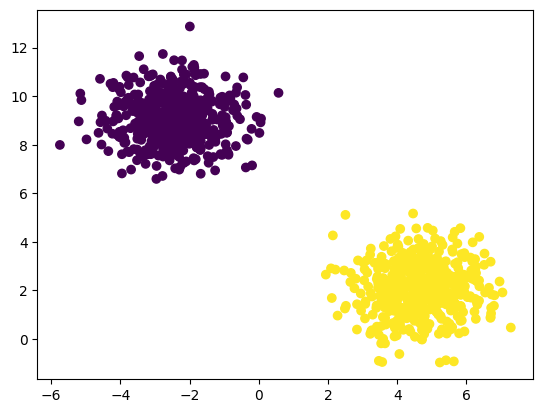

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X,y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=42)

plt.scatter(X[:,0], X[:, 1], c=y, marker="o")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
len(X_train.tolist())

670

In [12]:
from mlflow.tracking import MlflowClient
from mlflow.models.signature import infer_signature
client = MlflowClient()

In [13]:
import os
import warnings
import sys
import pandas as pd
import numpy as np
#import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from urllib.parse import urlparse
import mlflow
import mlflow.tensorflow
import keras


In [14]:
print(keras.__version__)
print(mlflow.__version__)

2.10.0
1.28.0


In [15]:
def print_auto_logged_info(r):
    tags = {k: v for k, v in r.data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [f.path for f in MlflowClient().list_artifacts(r.info.run_id, "model")]
    print("run_id: {}".format(r.info.run_id))
    print("artifacts: {}".format(artifacts))
    print("params: {}".format(r.data.params))
    print("metrics: {}".format(r.data.metrics))
    print("tags: {}".format(tags))

def train_keras_model(X, y,learning_rates,optimizer,epochs,batch_size,validation_split):
  optimizer=keras.optimizers.Adam(learning_rate=learning_rates)

  model_anr = Sequential()
  model_anr.add(Dense(8, input_shape=(X_train.shape[-1],), activation="relu", name="hidden_layer"))
  model_anr.add(Dense(1,activation = "sigmoid"))
  model_anr.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["binary_accuracy"])

  history = model_anr.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

  fig, ax = plt.subplots(2,1)
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['binary_accuracy'], color='b', label="Training binary accuracy")
  ax[1].plot(history.history['val_binary_accuracy'], color='r',label="Validation binary accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  test_loss, test_binary_accuracy = model_anr.evaluate(X_test, y_test)
  print("Test test_binary_accuracy: {}".format(test_binary_accuracy))

  mlflow.log_metric("test_loss", test_loss)
  mlflow.log_metric("test_binary_accuracy", test_binary_accuracy)
  return model_anr, history


In [ ]:
#!mlflow ui

2022/12/08 12:56:37 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2022/12/08 12:56:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


Epoch 1/10
19/19 [==============================] - 2s 53ms/step - loss: 0.1602 - binary_accuracy: 1.0000 - val_loss: 0.1466 - val_binary_accuracy: 1.0000
Epoch 2/10
19/19 [==============================] - 0s 5ms/step - loss: 0.1322 - binary_accuracy: 1.0000 - val_loss: 0.1214 - val_binary_accuracy: 1.0000
Epoch 3/10
19/19 [==============================] - 0s 5ms/step - loss: 0.1120 - binary_accuracy: 1.0000 - val_loss: 0.1049 - val_binary_accuracy: 1.0000
Epoch 4/10
19/19 [==============================] - 0s 5ms/step - loss: 0.0983 - binary_accuracy: 1.0000 - val_loss: 0.0927 - val_binary_accuracy: 1.0000
Epoch 5/10
19/19 [==============================] - 0s 5ms/step - loss: 0.0874 - binary_accuracy: 1.0000 - val_loss: 0.0823 - val_binary_accuracy: 1.0000
Epoch 6/10
19/19 [==============================] - 0s 5ms/step - loss: 0.0779 - binary_accuracy: 1.0000 - val_loss: 0.0733 - val_binary_accuracy: 1.0000
Epoch 7/10
19/19 [==============================] - 0s 5ms/step - loss: 0.0

Successfully registered model 'keras-modelo-1'.
2022/12/08 12:57:06 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: keras-modelo-1, version 1
Created version '1' of model 'keras-modelo-1'.


run_id: adaaeb331c0140c1a982b96d882c632f
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/data', 'model/python_env.yaml', 'model/requirements.txt']
params: {'batch_size': '32', 'epochs': '10', 'validation_split': '0.1', 'shuffle': 'True', 'class_weight': 'None', 'sample_weight': 'None', 'initial_epoch': '0', 'steps_per_epoch': 'None', 'validation_steps': 'None', 'validation_batch_size': 'None', 'validation_freq': '1', 'max_queue_size': '10', 'workers': '1', 'use_multiprocessing': 'False', 'opt_name': 'Adam', 'opt_learning_rate': '0.001', 'opt_decay': '0.0', 'opt_beta_1': '0.9', 'opt_beta_2': '0.999', 'opt_epsilon': '1e-07', 'opt_amsgrad': 'False'}
metrics: {'loss': 0.0497199147939682, 'binary_accuracy': 1.0, 'val_loss': 0.04616658762097359, 'val_binary_accuracy': 1.0, 'test_loss': 0.04302198067307472, 'test_binary_accuracy': 1.0}
tags: {}


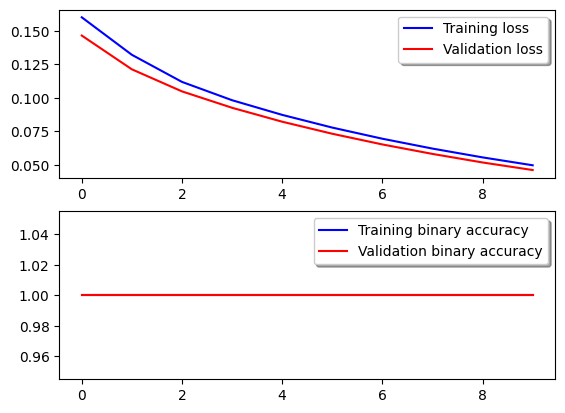

In [16]:
num_experiment = "Experiment 5"

if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)
    
    mlflow.autolog()
    #with mlflow.start_run(experiment_id=experiment_id_tf) as run:
    with mlflow.start_run(experiment_id=experiment_id_tf, run_name="Experiment 5") as run:

            mlflow.set_tag("mlflow.runName", "Experiment 5")
            epochs = 10
            batch_size = 32
            learning_rates = 0.001

            optimizer=keras.optimizers.Adam(learning_rate=learning_rates)

            # Log the model parameters used for this run.
            #mlflow.log_param("learning_rate", learning_rates)
            #mlflow.log_param("batch_size", batch_size)
            #mlflow.log_param("epochs", epochs)

            model = Sequential()
            model.add(Dense(8, input_shape=(2,), activation = "relu"))
            model.add(Dense(1,activation = "sigmoid"))
            model.compile(loss="binary_crossentropy" , optimizer=optimizer, metrics=["binary_accuracy"])

            history = model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)

           # log input features
            #mlflow.set_tag("features", str(X_train.columns.values.tolist()))

            #mlflow.log_metric("train_binary_accuracy", history.history['binary_accuracy'][-1])
            #mlflow.log_metric("val_binary_accuracy", history.history['val_binary_accuracy'][-1])
            #mlflow.log_metric("train_loss", history.history['loss'][-1])
            #mlflow.log_metric("val_loss", history.history['val_loss'][-1])

            fig, ax = plt.subplots(2,1)
            ax[0].plot(history.history['loss'], color='b', label="Training loss")
            ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
            legend = ax[0].legend(loc='best', shadow=True)

            ax[1].plot(history.history['binary_accuracy'], color='b', label="Training binary accuracy")
            ax[1].plot(history.history['val_binary_accuracy'], color='r',label="Validation binary accuracy")
            legend = ax[1].legend(loc='best', shadow=True)

            test_loss, test_binary_accuracy = model.evaluate(X_test, y_test)
            print("Test test_binary_accuracy: {}".format(test_binary_accuracy))

            mlflow.log_metric("test_loss", test_loss)
            mlflow.log_metric("test_binary_accuracy", test_binary_accuracy)

            # get model signature
            signature = infer_signature(model_input=X_train, model_output=model.predict(X_train))

            # Save the plot and log it as an artifact
            
            plt.savefig("behavior_plot.png")
            mlflow.log_artifact("behavior_plot.png")

            tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

            print('tracking_url_type_store:',tracking_url_type_store)

            mlflow.set_tracking_uri("http://localhost:5000")

            #from tensorflow.python.saved_model import signature_constants
            #tag=[keras.saved_model.tag_constants.SERVING]
            #tag=[tensorflow.compat.v1.saved_model.tag_constants.SERVING]
            #key=signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY

            # Model registry does not work with file store
            if tracking_url_type_store != "file":

                # Register the model
                # There are other ways to use the Model Registry, which depends on the use case,
                # please refer to the doc for more information:
                # https://mlflow.org/docs/latest/model-registry.html#api-workflow
                # Save model to artifacts
                mlflow.keras.log_model(keras_model = model, artifact_path='keras-models',signature=signature,
                registered_model_name="keras-modelo-1")
            else:
                # Save model to artifacts
                mlflow.keras.log_model(keras_model = model, artifact_path="keras-models",signature=signature,
                registered_model_name="keras-modelo-1")
                #mlflow.keras.log_model()

# fetch the auto logged parameters and metrics for ended run
print_auto_logged_info(mlflow.get_run(run_id=run.info.run_id))

mlflow.end_run()


2022/12/08 13:15:34 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of keras. If you encounter errors during autologging, try upgrading / downgrading keras to a supported version, or try upgrading MLflow.


Epoch 1/10
19/19 [==============================] - 1s 22ms/step - loss: 0.2157 - binary_accuracy: 0.9552 - val_loss: 0.2004 - val_binary_accuracy: 0.9552
Epoch 2/10
19/19 [==============================] - 0s 9ms/step - loss: 0.2011 - binary_accuracy: 0.9585 - val_loss: 0.1869 - val_binary_accuracy: 0.9552
Epoch 3/10
19/19 [==============================] - 0s 6ms/step - loss: 0.1877 - binary_accuracy: 0.9619 - val_loss: 0.1748 - val_binary_accuracy: 0.9552
Epoch 4/10
19/19 [==============================] - 0s 6ms/step - loss: 0.1755 - binary_accuracy: 0.9751 - val_loss: 0.1641 - val_binary_accuracy: 0.9552
Epoch 5/10
19/19 [==============================] - 0s 5ms/step - loss: 0.1648 - binary_accuracy: 0.9801 - val_loss: 0.1541 - val_binary_accuracy: 0.9552
Epoch 6/10
19/19 [==============================] - 0s 6ms/step - loss: 0.1549 - binary_accuracy: 0.9818 - val_loss: 0.1452 - val_binary_accuracy: 0.9552
Epoch 7/10
19/19 [==============================] - 0s 5ms/step - loss: 0.1

Successfully registered model 'keras-modelo-2'.
2022/12/08 13:16:01 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: keras-modelo-2, version 1
Created version '1' of model 'keras-modelo-2'.


run_id: c4b59d1e3019403c82df9058c46ec175
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/data', 'model/python_env.yaml', 'model/requirements.txt']
params: {'epochs': '10', 'batch_size': '32', 'validation_split': '0.1', 'shuffle': 'True', 'class_weight': 'None', 'sample_weight': 'None', 'initial_epoch': '0', 'steps_per_epoch': 'None', 'validation_steps': 'None', 'validation_batch_size': 'None', 'validation_freq': '1', 'max_queue_size': '10', 'workers': '1', 'use_multiprocessing': 'False', 'num_layers': '2', 'optimizer_name': 'Adam', 'learning_rate': '1e-04', 'epsilon': '1e-07'}
metrics: {'loss': 0.12389873713254929, 'binary_accuracy': 0.9883913993835449, 'val_loss': 0.11686544120311737, 'val_binary_accuracy': 0.9850746393203735, 'test_loss': 0.11582617461681366, 'test_binary_accuracy': 0.9878787994384766}
tags: {}


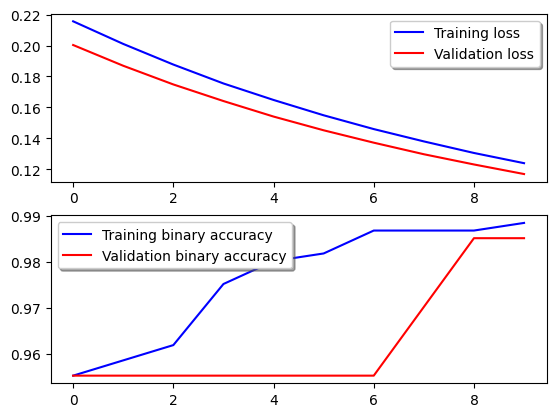

In [17]:
num_experiment = "Experiment 6"

if __name__ == "__main__":
    mlflow.set_tracking_uri("http://localhost:5000")
    warnings.filterwarnings("ignore")
    np.random.seed(40)
    
    mlflow.keras.autolog()
    #mlflow.autolog()
    #with mlflow.start_run(experiment_id=experiment_id_tf) as run:
    with mlflow.start_run(experiment_id=experiment_id_tf, run_name=num_experiment) as run:

          # Automatically capture the model's parameters, metrics, artifacts,
            # and source code with the `autolog()` function
            #mlflow.keras.autolog()

            mlflow.set_tag("mlflow.runName", num_experiment)

            learning_rates = 0.0001
            optimizer=keras.optimizers.Adam(learning_rate=learning_rates)
            epochs = 10
            batch_size = 32
            validation_split = 0.1

            model_anr, history  = train_keras_model(X, y,learning_rates,optimizer,epochs,batch_size,validation_split)

            # get model signature
            signature = infer_signature(model_input=X_train, model_output=model_anr.predict(X_train))

            # Save the plot and log it as an artifact
            
            plt.savefig("behavior_plot2.png")
            mlflow.log_artifact("behavior_plot2.png")

            tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

            print('tracking_url_type_store:',tracking_url_type_store)

            #from tensorflow.python.saved_model import signature_constants
            #tag=[keras.saved_model.tag_constants.SERVING]
            #tag=[tensorflow.compat.v1.saved_model.tag_constants.SERVING]
            #key=signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY

            # Model registry does not work with file store
            if tracking_url_type_store != "file":

                # Register the model
                # There are other ways to use the Model Registry, which depends on the use case,
                # please refer to the doc for more information:
                # https://mlflow.org/docs/latest/model-registry.html#api-workflow
                # Save model to artifacts
                mlflow.keras.log_model(keras_model = model_anr, artifact_path='keras-models',signature=signature,
                registered_model_name="keras-modelo-2")
            else:
                # Save model to artifacts
                mlflow.keras.log_model(keras_model = model_anr, artifact_path="keras-models",signature=signature,
                registered_model_name="keras-modelo-2")
                #mlflow.keras.log_model()

# fetch the auto logged parameters and metrics for ended run
print_auto_logged_info(mlflow.get_run(run_id=run.info.run_id))

mlflow.end_run()